In [1]:
%matplotlib inline
import numpy as np
import os
import cv2
import matplotlib.pyplot as plt

root = r'C:\Users\Aulamultimedia\MEGA\Especializacion en Inteligencia Artificial UBA\Materias\Bimestre 2\Vision por Computadora 1\vision_computadora_I\Material_TPs\TP1'

## Ejercicio 1: Implementar el algoritmo de pasaje a coordenadas cromáticas para liberarnos de las variaciones de contraste

In [2]:
# Cargo las imagenes

img1 = cv2.imread(os.path.join(root,'CoordCrom_1.png'))
img2 = cv2.imread(os.path.join(root,'CoordCrom_2.png'))
img3 = cv2.imread(os.path.join(root,'CoordCrom_3.png'))


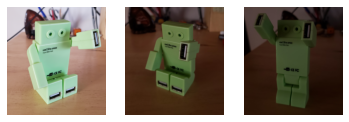

In [3]:
# Observo las imagenes originales
fig = plt.figure()
fig1 = plt.subplot(131)
fig1.imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))
fig1.axis("off")
fig2 = plt.subplot(132)
fig2.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))
fig2.axis("off")
fig3 = plt.subplot(133)
fig3.imshow(cv2.cvtColor(img3, cv2.COLOR_BGR2RGB))
fig3.axis("off")
plt.show()

In [4]:
# Implemento las coordenadas cromáticas dividiendo cada canal por la suma del resto de los canales
def coord_crom(img):
    b = np.float16(img[:,:,0])
    g = np.float16(img[:,:,1])
    r = np.float16(img[:,:,2])
    #print('promedio para canal r: {}'.format(np.average(r)))
    #print('promedio para canal g: {}'.format(np.average(g)))
    #print('promedio para canal b: {}'.format(np.average(b)))
    #print('min valor de b por 255:', np.max(b*255))
    bb = np.uint8(np.divide(b*255,b+g+r))
    gg = np.uint8(np.divide(g*255,b+g+r))
    rr = np.uint8(np.divide(r*255,b+g+r))
    where_are_NaNs = np.isnan(bb)
    bb[where_are_NaNs] = 0
    where_are_NaNs = np.isnan(gg)
    gg[where_are_NaNs] = 0
    where_are_NaNs = np.isnan(rr)
    rr[where_are_NaNs] = 0
    #print('promedio para nuevo canal r: {}'.format(np.average(rr)))
    #print('promedio para nuevo canal g: {}'.format(np.average(gg)))
    #print('promedio para nuevo canal b: {}'.format(np.average(bb)))
    img = cv2.merge((bb,gg,rr))
    
    return img

In [5]:
image1 = coord_crom(img1)
image2 = coord_crom(img2)
image3 = coord_crom(img3)


C:\Users\AULAMU~1\AppData\Local\Temp/ipykernel_7516/1379446881.py:10: RuntimeWarning: invalid value encountered in true_divide
  bb = np.uint8(np.divide(b*255,b+g+r))
C:\Users\AULAMU~1\AppData\Local\Temp/ipykernel_7516/1379446881.py:11: RuntimeWarning: invalid value encountered in true_divide
  gg = np.uint8(np.divide(g*255,b+g+r))
C:\Users\AULAMU~1\AppData\Local\Temp/ipykernel_7516/1379446881.py:12: RuntimeWarning: invalid value encountered in true_divide
  rr = np.uint8(np.divide(r*255,b+g+r))


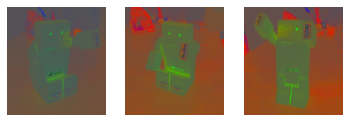

In [6]:
# Observo el resultado de aplicar la transformación
fig = plt.figure()
fig1 = plt.subplot(131)
fig1.imshow(cv2.cvtColor(image1, cv2.COLOR_BGR2RGB))
fig1.axis("off")
fig2 = plt.subplot(132)
fig2.imshow(cv2.cvtColor(image2, cv2.COLOR_BGR2RGB))
fig2.axis("off")
fig3 = plt.subplot(133)
fig3.imshow(cv2.cvtColor(image3, cv2.COLOR_BGR2RGB))
fig3.axis("off")
plt.show()

## Ejercicio 2: Implementar el algoritmo White Patch para liberarnos de las diferencias de color de iluminación

In [7]:
# Cargo las imagenes

img11 = cv2.imread(os.path.join(root,'WP_O.png'))
img22 = cv2.imread(os.path.join(root,'WP_R.png'))
img33 = cv2.imread(os.path.join(root,'WP_B.png'))

#cv2.imshow('img1', img1)
#cv2.waitKey(5000)
#cv2.destroyAllWindows()

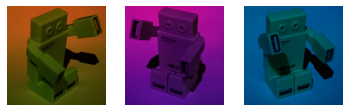

In [8]:
# Observo las imagenes originales
fig = plt.figure()
fig1 = plt.subplot(131)
fig1.imshow(cv2.cvtColor(img11, cv2.COLOR_BGR2RGB))
fig1.axis("off")
fig2 = plt.subplot(132)
fig2.imshow(cv2.cvtColor(img22, cv2.COLOR_BGR2RGB))
fig2.axis("off")
fig3 = plt.subplot(133)
fig3.imshow(cv2.cvtColor(img33, cv2.COLOR_BGR2RGB))
fig3.axis("off")
plt.show()

In [18]:
# Implemento el algoritmo white-patch
def white_patch(img):
    b = np.float_(img[:,:,0])
    g = np.float_(img[:,:,1])
    r = np.float_(img[:,:,2])
    print('max para canal r: {}'.format(np.max(r)))
    print('max para canal g: {}'.format(np.max(g)))
    print('max para canal b: {}'.format(np.max(b)))
    #print('min valor de b por 255:', np.max(b*255))
    bb = np.uint8(np.multiply(b,np.divide(255.0,np.max(b))))
    gg = np.uint8(np.multiply(g,np.divide(255.0,np.max(g))))
    rr = np.uint8(np.multiply(r,np.divide(255.0,np.max(r))))
    where_are_NaNs = np.isnan(bb)
    bb[where_are_NaNs] = 0
    where_are_NaNs = np.isnan(gg)
    gg[where_are_NaNs] = 0
    where_are_NaNs = np.isnan(rr)
    rr[where_are_NaNs] = 0
    print('promedio para nuevo canal r: {}'.format(np.average(rr)))
    print('promedio para nuevo canal g: {}'.format(np.average(gg)))
    print('promedio para nuevo canal b: {}'.format(np.average(bb)))
    print('minimo para nuevo canal r: {}'.format(np.min(rr)))
    print('minimo para nuevo canal g: {}'.format(np.min(gg)))
    print('minimo para nuevo canal b: {}'.format(np.min(bb)))
    print('maximo para nuevo canal r: {}'.format(np.max(rr)))
    print('maximo para nuevo canal g: {}'.format(np.max(gg)))
    print('maximo para nuevo canal b: {}'.format(np.max(bb)))
    img = cv2.merge((bb,gg,rr))
    
    return img

In [19]:
image11 = white_patch(img11)
image22 = white_patch(img22)
image33 = white_patch(img33)

max para canal r: 199.0
max para canal g: 112.0
max para canal b: 49.0
promedio para nuevo canal r: 109.09978585910126
promedio para nuevo canal g: 147.77527961807468
promedio para nuevo canal b: 43.480584829922186
minimo para nuevo canal r: 0
minimo para nuevo canal g: 0
minimo para nuevo canal b: 0
maximo para nuevo canal r: 255
maximo para nuevo canal g: 255
maximo para nuevo canal b: 255
max para canal r: 208.0
max para canal g: 47.0
max para canal b: 173.0
promedio para nuevo canal r: 117.103156081134
promedio para nuevo canal g: 62.167812671313335
promedio para nuevo canal b: 159.14712820111208
minimo para nuevo canal r: 0
minimo para nuevo canal g: 0
minimo para nuevo canal b: 0
maximo para nuevo canal r: 255
maximo para nuevo canal g: 255
maximo para nuevo canal b: 255
max para canal r: 31.0
max para canal g: 118.0
max para canal b: 166.0
promedio para nuevo canal r: 7.43761610149581
promedio para nuevo canal g: 151.1765839141671
promedio para nuevo canal b: 156.13175346542408


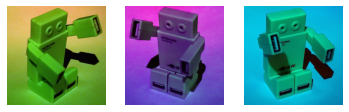

In [20]:
# Observo el resultado de aplicar la transformación
fig = plt.figure()
fig1 = plt.subplot(131)
fig1.imshow(cv2.cvtColor(image11, cv2.COLOR_BGR2RGB))
fig1.axis("off")
fig2 = plt.subplot(132)
fig2.imshow(cv2.cvtColor(image22, cv2.COLOR_BGR2RGB))
fig2.axis("off")
fig3 = plt.subplot(133)
fig3.imshow(cv2.cvtColor(image33, cv2.COLOR_BGR2RGB))
fig3.axis("off")
plt.show()